
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [6]:

import numpy as np
import matplotlib.pyplot as plt


In [7]:
class StandardScalerManual:
    def __init__(self):
        self.mean = None
        self.std = None
    def fit(self, X):
        """
        Compute the mean and standard deviation to be used for later scaling.
        """
        # Calculate mean across the rows (axis 0) -> resulting shape (n_features,)
        self.mean = np.mean(X, axis=0)
        # Calculate standard deviation
        self.std = np.std(X, axis=0)

        # Handle cases where std is 0 to avoid division by zero (optional but good practice)
        # Replacing 0 with 1 ensures no change for constant features
        self.std[self.std == 0] = 1.0

    def transform(self, X):
        """
        Perform standardization by centering and scaling.
        """
        if self.mean is None or self.std is None:
            raise Exception("Scaler has not been fitted yet.")

        # Z = (X - mu) / sigma
        return (X - self.mean) / self.std
    def fit_transform(self, X):
        """
        Fit to data, then transform it.
        """
        self.fit(X)
        return self.transform(X)

In [8]:
# 2. Linear Regression with L2 Regularization (Ridge)
# ==========================================
# L1 regularization (Lasso) adds a penalty equal to the absolute value of the magnitude of coefficients.
# L2 regularization (Ridge) adds a penalty equal to the square of the magnitude of coefficients.
# Formula for Cost with L2: J(w,b) = (1/2m) * sum((y_hat - y)^2) + (lambda/2) * sum(w^2)
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []
    def fit(self, X, y):
        # Initialize parameters
        # X shape: (m_samples, n_features)
        # y shape: (m_samples,) or (m_samples, 1)

        m_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []

        # Ensure y is 1D array if it's not
        y = y.ravel()
        for i in range(self.epochs):
            # 1. Prediction (Hypothesis)
            # y_hat = X * w + b
            y_predicted = np.dot(X, self.weights) + self.bias

            # 2. Compute Loss (MSE + L2 Penalty)
            # MSE portion
            error = y_predicted - y
            mse_loss = (1 / (2 * m_samples)) * np.sum(error ** 2)

            # Regularization portion (exclude bias from regularization usually)
            l2_loss = (self.l2_lambda / 2) * np.sum(self.weights ** 2)

            total_loss = mse_loss + l2_loss
            self.loss_history.append(total_loss)
            # 3. Gradient Calculation
            # dw = (1/m) * X.T * (y_hat - y) + (lambda * w)  <-- Note: derivative of (lambda/2)w^2 is lambda*w
            # db = (1/m) * sum(y_hat - y)

            dw = (1 / m_samples) * np.dot(X.T, error) + (self.l2_lambda * self.weights)
            db = (1 / m_samples) * np.sum(error)
            # 4. Update Parameters (Gradient Descent)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Optional: Print loss every 100 epochs
            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {total_loss:.4f}")
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Epoch 0, Loss: 25.3636
Epoch 100, Loss: 0.1164
Epoch 200, Loss: 0.1164
Epoch 300, Loss: 0.1164
Epoch 400, Loss: 0.1164


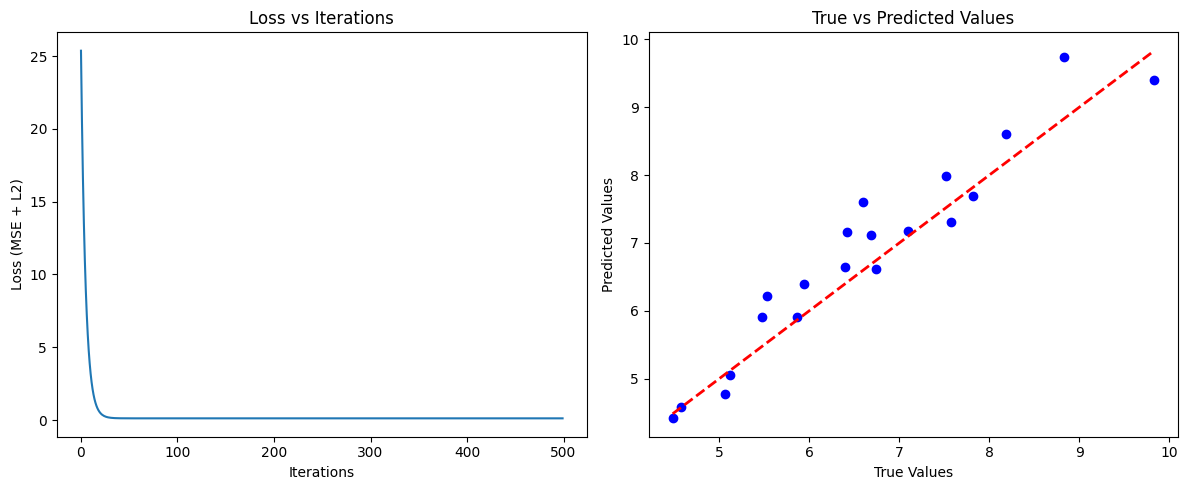

In [9]:
# 3. Usage Example (Synthetic Data)
# ==========================================
if __name__ == "__main__":
    # Generate some synthetic linear data
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1) * 0.5  # y = 4 + 3x + noise
    y = y.ravel()
    # Split into train/test (Manual split)
    indices = np.random.permutation(X.shape[0])
    train_idx, test_idx = indices[:80], indices[80:]
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    # --- Step 1: Standardization ---
    scaler = StandardScalerManual()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # --- Step 2: Linear Regression with L2 ---
    # Try with small regularization
    model = LinearRegressionManual(lr=0.1, epochs=500, l2_lambda=0.01)
    model.fit(X_train_scaled, y_train)
    # Predictions
    y_pred = model.predict(X_test_scaled)
    # --- Step 3: Plotting ---
    plt.figure(figsize=(12, 5))
    # Plot 1: Loss vs Iterations
    plt.subplot(1, 2, 1)
    plt.plot(model.loss_history)
    plt.xlabel("Iterations")
    plt.ylabel("Loss (MSE + L2)")
    plt.title("Loss vs Iterations")
    # Plot 2: True vs Predicted
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Identity line
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("True vs Predicted Values")
    plt.tight_layout()
    plt.show() # This will display the plots


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [10]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    """
    Sigmoid activation function.
    z: input (scalar or array)
    return: value between 0 and 1
    """
    # Clip z to avoid overflow in exp
    z = np.clip(z, -250, 250)
    return 1 / (1 + np.exp(-z))


In [11]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []
    def fit(self, X, y):
        """
        Train the logistic regression model using Gradient Descent with L2 regularization.
        """
        m_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []

        # Ensure y is 1D
        y = y.ravel()
        for i in range(self.epochs):
            # 1. Linear model: z = w*x + b
            linear_model = np.dot(X, self.weights) + self.bias

            # 2. Activation: sigmoid(z)
            y_predicted = sigmoid(linear_model)

            # 3. Compute Loss (Binary Cross Entropy + L2 Penalty)
            # Add epsilon to log to prevent log(0)
            epsilon = 1e-15
            y_pred_clipped = np.clip(y_predicted, epsilon, 1 - epsilon)

            # BCE Loss
            bce_loss = -(1 / m_samples) * np.sum(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))

            # L2 Regularization (exclude bias)
            l2_loss = (self.l2_lambda / 2) * np.sum(self.weights ** 2)

            total_loss = bce_loss + l2_loss
            self.loss_history.append(total_loss)
            # 4. Gradient Calculation
            # dz = y_hat - y
            # dw = (1/m) * X.T * dz + lambda * w
            # db = (1/m) * sum(dz)

            dz = y_predicted - y
            dw = (1 / m_samples) * np.dot(X.T, dz) + (self.l2_lambda * self.weights)
            db = (1 / m_samples) * np.sum(dz)
            # 5. Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {total_loss:.4f}")
    def predict_proba(self, X):
        """
        Return the probability of class 1.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)
    def predict(self, X):
        """
        Return class labels (0 or 1).
        threshold = 0.5
        """
        y_pred_proba = self.predict_proba(X)
        return [1 if i >= 0.5 else 0 for i in y_pred_proba]

    def score(self, X, y):
        # Accuracy
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.6351
Epoch 200, Loss: 0.6345
Epoch 300, Loss: 0.6345
Epoch 400, Loss: 0.6345
Epoch 500, Loss: 0.6345
Epoch 600, Loss: 0.6345
Epoch 700, Loss: 0.6345
Epoch 800, Loss: 0.6345
Epoch 900, Loss: 0.6345

Final Accuracy on Test Set: 0.6000


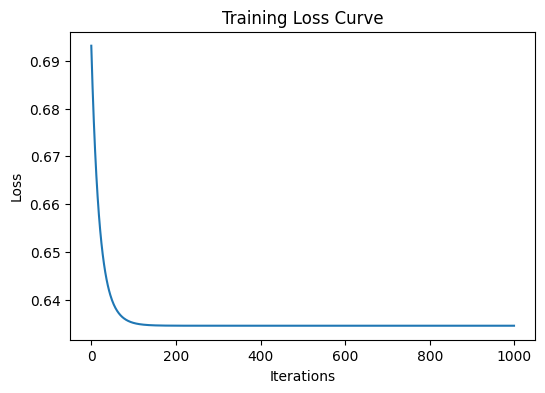

In [13]:
# 3. Usage Example (Synthetic Data)
# ==========================================
if __name__ == "__main__":
    # Generate synthetic binary data
    np.random.seed(0)
    # Class 0: centered at (2, 2)
    # Class 1: centered at (4, 4)
    X0 = np.random.randn(50, 2) + 2
    X1 = np.random.randn(50, 2) + 2.5
    X = np.vstack((X0, X1))
    y = np.hstack((np.zeros(50), np.ones(50))) # Labels
    # Shuffle
    indices = np.random.permutation(X.shape[0])
    X, y = X[indices], y[indices]
    # Split
    train_size = int(0.8 * X.shape[0])
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    # --- Step 1: Standardization ---
    scaler = StandardScalerManual()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # --- Step 2: Logistic Regression with L2 ---
    log_reg = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
    log_reg.fit(X_train_scaled, y_train)
    # --- Step 3: Reporting ---
    print(f"\nFinal Accuracy on Test Set: {log_reg.score(X_test_scaled, y_test):.4f}")
    # Plot Loss Curve
    plt.figure(figsize=(6, 4))
    plt.plot(log_reg.loss_history)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import defaultdict

In [15]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''

    # 1. Flatten the matrix to (n_samples, n_features)
    # Each element is a sample, so we reshape to (-1, 1)
    M_flat = M.reshape(-1, 1)

    # 2. Fit KMeans
    kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=42, n_init=10)
    kmeans.fit(M_flat)

    # 3. Get labels and centroids
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_.flatten() # Flatten to 1D array

    # 4. Reshape labels to get assignment_table
    rows, cols = M.shape
    assignment_table = labels.reshape(rows, cols)

    # 5. Build cookbook
    cookbook = defaultdict(list)
    for i in range(rows):
        for j in range(cols):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    # Convert defaultdict to regular dict for clean return
    cookbook = dict(cookbook)

    return assignment_table, cookbook, centroids


Original Matrix M:
 [[38 28 14 42  7 20 38 18 22 10]
 [10 23 35 39 23  2 21  1 23 43]
 [29 37  1 20 32 11 21 43 24 48]
 [26 41 27 15 14 46 43  2 36  6]
 [20  8 38 17  3 24 13 49  8 25]
 [ 1 19 27 46  6 43  7 46 34 13]
 [16 35 49 39  3  1  5 41  3 28]
 [17 25 43 33  9 35 13 30 47 14]
 [ 7 13 22 39 20 15 44 17 46 23]
 [25 24 44 40 28 14 44  0 24  6]]

Centroids: [41.33333333  7.72727273 23.17647059]

Assignment Table (Cluster Labels):
 [[0 2 1 0 1 2 0 2 2 1]
 [1 2 0 0 2 1 2 1 2 0]
 [2 0 1 2 2 1 2 0 2 0]
 [2 0 2 1 1 0 0 1 0 1]
 [2 1 0 2 1 2 1 0 1 2]
 [1 2 2 0 1 0 1 0 0 1]
 [2 0 0 0 1 1 1 0 1 2]
 [2 2 0 0 1 0 1 2 0 1]
 [1 1 2 0 2 1 0 2 0 2]
 [2 2 0 0 2 1 0 1 2 1]]

Positions for Cluster 0 (First 5): [(0, 0), (0, 3), (0, 6), (1, 2), (1, 3)] ...


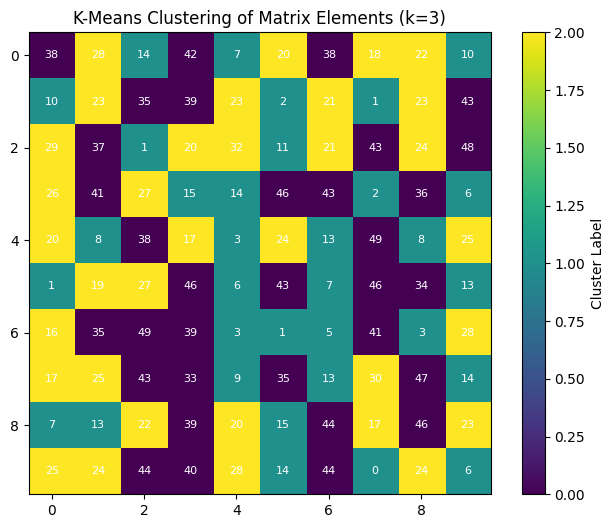

In [16]:
# Usage Example
# ==========================================
if __name__ == "__main__":
    # Generate random matrix (random integer values for visualization clarity)
    np.random.seed(42)
    M = np.random.randint(0, 50, size=(10, 10))
    k = 3

    print("Original Matrix M:\n", M)

    # Run K-Means
    assignment_table, cookbook, centroids = kmeans_matrix(M, k, max_iters=100)

    print("\nCentroids:", centroids)
    print("\nAssignment Table (Cluster Labels):\n", assignment_table)

    # Check one cluster from cookbook
    print(f"\nPositions for Cluster 0 (First 5): {cookbook[0][:5]} ...")

    # Visualize
    plt.figure(figsize=(8, 6))
    plt.imshow(assignment_table, cmap='viridis')
    plt.colorbar(label='Cluster Label')
    plt.title(f"K-Means Clustering of Matrix Elements (k={k})")
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            plt.text(j, i, str(M[i, j]), ha='center', va='center', color='white', fontsize=8)
    plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
